### Phase 1:  Introduction and Data Collection

### Introduction

EDSA has provided a challege to construct regression capable of accurately predicting how much a kilogram of golden delicious apples apple will cost given certain parameters. This challenge will follow the five phases of the data science process, which include data collection, cleaning, exploratory data analysis, model building and model deployment.



### Data Collection

The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.
The data supplied includes:
sample_submission.csv - Sample of the submission format for the hackathon.
df - test_set.csv - The test split of the dataset.
df - train_set.csv - The training split of the dataset.

# Phase 2: Data Cleaning

We will start by first importing some of the packages we will need to clean and explore our data. This is not an exclusive list of all the packages. Should we need more packages in the process we will import them at a later stage as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-train_set.csv') # import the train data for exploration

In [3]:
df_train.head()# explore the data

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [5]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The first step in our datacleaning process is to check for null values and decide how to deal with them. As we can see the table has 13 columns, all the columns are set as non_ null which tells us that we dont have any null values to deal with. 
If we have a look at the data types, we can already tell that most of the data types are appropriate for the columns, The only data type that we could change would be the date column, should we need the date column in our data analysis or model building phase it would be easier to deal with it as a datetime datatype rather than an object.

In [6]:
df_train['Date'] = pd.to_datetime(df_train['Date']) # change the date column from string datatype
                                                    # to datetime datatype

In [7]:
df_train.info() # lets confirm our changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 6.4+ MB


# Phase 3: Exploratory Data Analysis

## Univariate Analysis

Lets analyse each feature to see what insights we can gain from them. As we can see, we have 5 categorical data types and 8 numerical datatypes. We will analyse the numerical data types using descriptive statistics.

In [8]:
new_df_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS'] # filter for APPLE GOLDEN DELICIOUS
new_df_train.describe()# calculates our 5 number summary as well as our measures of central tendency

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


From this breakdown we can see that the maximum average price per kg we have sold our golden apples for is R21.24 and the minimum is R0.25.

In [9]:
new_df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

From this analysis we can see that almost all of our features have a high positive skew meaning that most of our data is skewed to the left. 

In [10]:
new_df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

This indicates that most of our data has High kurtosis which indicates a large number of outliers exist in our data. Why is that?? maybe because the quantities purchased from the market were varied. Some people purchased 400 kg worth of apples, probably for resale at wholesalers and some bought 3kg worth of apples e.g maybe for household or for resale at a street corner. Therefore the skewness and kurtosis of most of our columns is to be expected.However, we can see that our avrage price per kg is fairly symmetrical and a low kutosis whis is to be expected because the avg_price_per_kg column is a calculated column that has been averaged and calculated per kg.

 Lets look at the distribution of our numerical features to get a better understanding.

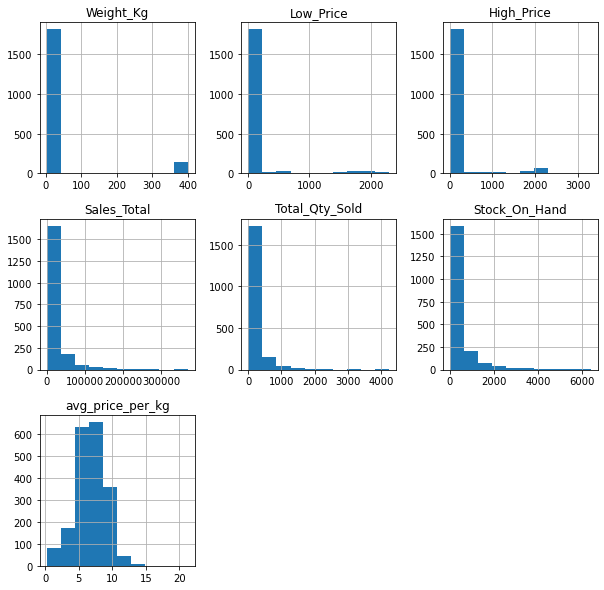

In [11]:
columns = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand','avg_price_per_kg' ] # create a list of all numerical columns
new_df_train[columns].hist(figsize=(10,10));

As expected, our average price per kg follows a normal distribution with most of our prices lieing on the R5 to R10 range. However the rest of our variables are affeted a lot by outliers.

Lets draw boxplots on our columns to confirm the outliers.

<AxesSubplot:xlabel='Weight_Kg'>

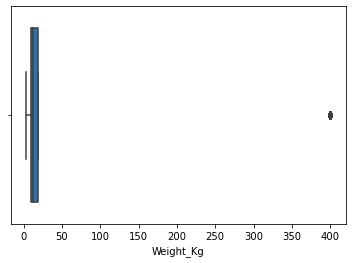

In [12]:

sns.boxplot(x='Weight_Kg', data=new_df_train)

<AxesSubplot:xlabel='Stock_On_Hand'>

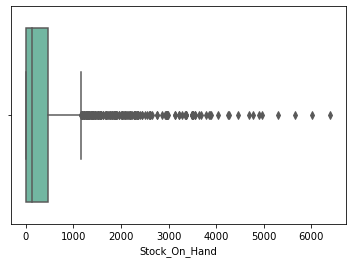

In [13]:
sns.boxplot(x = 'Stock_On_Hand', data=new_df_train, orient="h", palette="Set2")

<AxesSubplot:xlabel='avg_price_per_kg'>

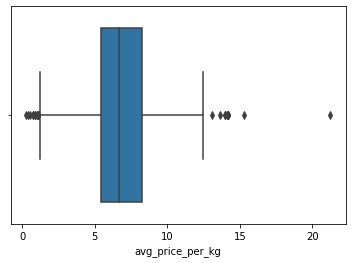

In [14]:
sns.boxplot(x='avg_price_per_kg', data=new_df_train)

<AxesSubplot:xlabel='Sales_Total'>

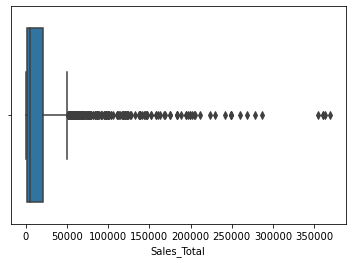

In [15]:
sns.boxplot(x='Sales_Total', data=new_df_train)


<AxesSubplot:xlabel='Total_Qty_Sold'>

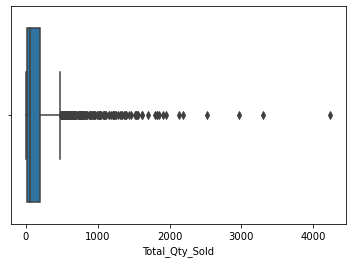

In [16]:
sns.boxplot(x='Total_Qty_Sold', data=new_df_train)

From the box plots above we can clearly see where our outliers are and can

Let us remove the outliers to see if we can get a more normal distribution of our numerical features.

In [17]:
df_train_o = new_df_train[new_df_train['Weight_Kg']<= 20]
df_train_o = df_train_o[df_train_o['Sales_Total']<= 50000]
df_train_o = df_train_o[df_train_o['avg_price_per_kg']<= 15]
df_train_o = df_train_o[df_train_o['Stock_On_Hand']<= 1300]
df_train_o = df_train_o[df_train_o['Total_Qty_Sold']<= 1300]

In [18]:
print(df_train_o.shape)
df_train_o.describe()

(1526, 13)


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,12.635256,84.436435,100.823067,8852.199869,104.703145,1270.093578,231.437746,6.907136
std,4.029132,46.685901,52.746000,11324.096521,136.856293,1599.035083,289.767852,2.182577
min,3.000000,5.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000
25%,9.000000,50.000000,60.000000,971.250000,12.000000,148.050000,8.000000,5.560000
50%,12.000000,70.000000,84.000000,4060.000000,54.000000,659.400000,109.000000,6.685000
75%,18.300000,120.000000,140.000000,11550.000000,143.500000,1733.550000,348.750000,8.397500
max,18.300000,260.000000,270.000000,49860.000000,923.000000,8307.000000,1292.000000,14.210000


After removing the outliers we can see that our data is still enough to create a model out of. Lets see our distrbutions now.

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Stock_On_Hand'}>],
       [<AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

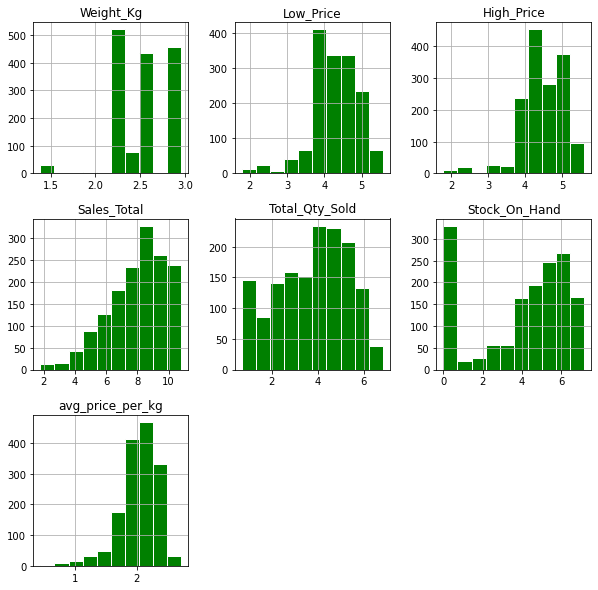

In [19]:
TotalLog = np.log(df_train_o[columns] + 1)
TotalLog.hist(color='green', edgecolor='white', figsize=(10,10))

## Multivariate Analysis

We will start by first analysing the relationships between our features.

At this stage I would like to seperate the Date column into day, month and year so that I can analyse the relationships it has in this dataset.


In [20]:
df_train_o['day'] = df_train_o['Date'].dt.day
df_train_o['month'] = df_train_o['Date'].dt.month
df_train_o['year'] = df_train_o['Date'].dt.year

In [21]:
df_train_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 7 to 64310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1526 non-null   object        
 1   Container         1526 non-null   object        
 2   Size_Grade        1526 non-null   object        
 3   Weight_Kg         1526 non-null   float64       
 4   Commodities       1526 non-null   object        
 5   Date              1526 non-null   datetime64[ns]
 6   Low_Price         1526 non-null   float64       
 7   High_Price        1526 non-null   float64       
 8   Sales_Total       1526 non-null   float64       
 9   Total_Qty_Sold    1526 non-null   int64         
 10  Total_Kg_Sold     1526 non-null   float64       
 11  Stock_On_Hand     1526 non-null   int64         
 12  avg_price_per_kg  1526 non-null   float64       
 13  day               1526 non-null   int64         
 14  month             1526 

In [22]:
df_train_o.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,13,3,2020
117,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,30,12,2019
122,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,5,8,2020


We will first start by analysing our stocking capabilities which are in the Province and Weight_Kg columns. By looking at the relationship between the province were the produce is grown and the total KG's sold, we can then see which farmers give us the most sales.

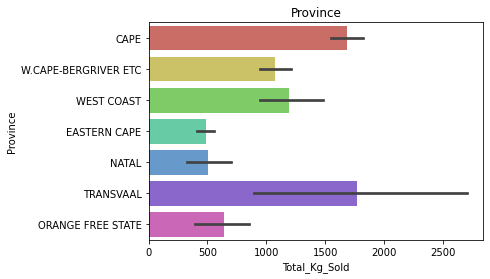

In [23]:
sns.barplot(x = 'Total_Kg_Sold',y= 'Province', data = df_train_o, palette="hls")
plt.title("Province");

As we can see, most of the apples that we sold came from the Transvaal followed by the Cape

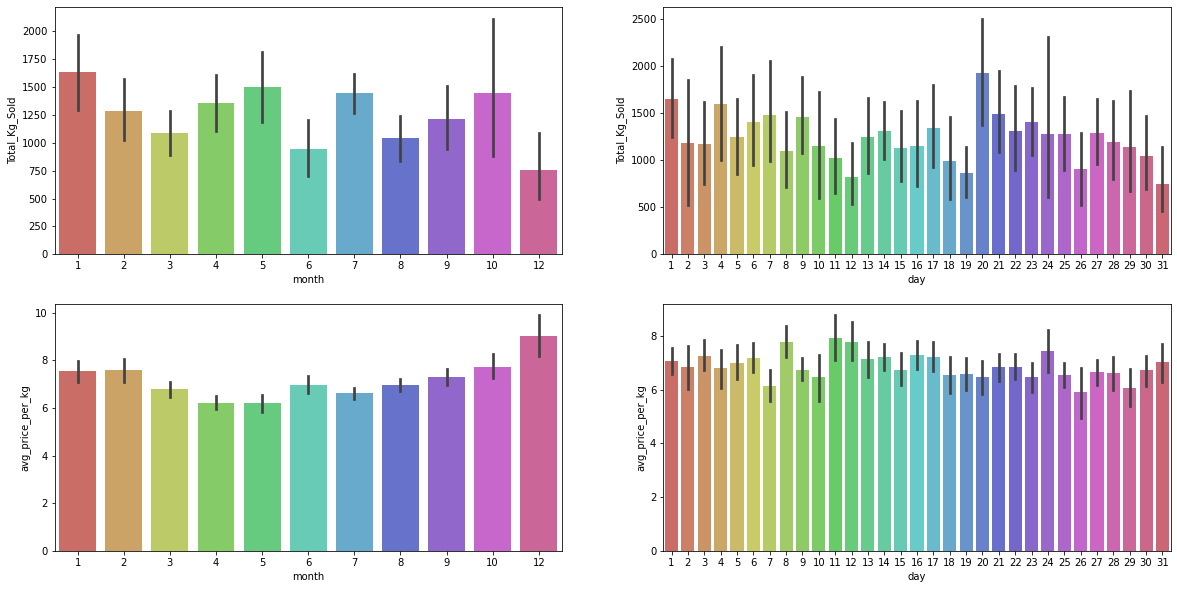

In [24]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.barplot(x = 'month',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,0])
sns.barplot(x = 'day',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,1])
sns.barplot(x = 'month',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,0])
sns.barplot(x = 'day',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,1])

plt.show()

The top two graphs above show us our sales in KG per month and per day. We can see that we've sold more apples in January, may and July then in the other months and our biggest sales quantities happened on the 20th of the month.

The bottom two graphs above tell us the relationship between the months and days of the year and the  average price per kg. It tells us that the avg price per kg of apples is higher in December than in other months.These relationships can possibly guide our decisions on how much stock we need to have on hand on any given month.

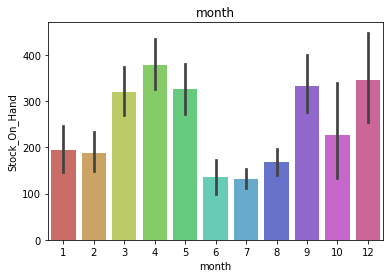

In [25]:
sns.barplot(x = 'month',y= 'Stock_On_Hand', data = df_train_o, palette="hls")
plt.title("month");

The graph above shows us the months where we have the most stock in storage. We can use our predictions on purchase behaviour of our customers to decide how much stock to keep on any given month.

In [26]:
df_train_o.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
Weight_Kg,1.000000,0.788554,0.874696,0.234361,-0.095921,0.147571,0.161826,0.485744,-0.060180,-0.073081,-0.045588
Low_Price,0.788554,1.000000,0.886864,0.144284,-0.156124,0.005982,0.089528,0.831026,-0.074253,0.022831,-0.153010
High_Price,0.874696,0.886864,1.000000,0.312705,-0.035650,0.176737,0.205196,0.772376,-0.072066,-0.012173,-0.130478
Sales_Total,0.234361,0.144284,0.312705,1.000000,0.830985,0.953019,0.215335,0.189959,-0.056709,-0.062858,0.042229
Total_Qty_Sold,-0.095921,-0.156124,-0.035650,0.830985,1.000000,0.923844,0.131386,-0.070477,-0.019124,-0.029160,0.056963
Total_Kg_Sold,0.147571,0.005982,0.176737,0.953019,0.923844,1.000000,0.191444,0.022730,-0.040291,-0.050316,0.057866
Stock_On_Hand,0.161826,0.089528,0.205196,0.215335,0.131386,0.191444,1.000000,0.128045,0.038944,-0.053472,-0.070896
avg_price_per_kg,0.485744,0.831026,0.772376,0.189959,-0.070477,0.022730,0.128045,1.000000,-0.080105,0.056267,-0.174513
day,-0.060180,-0.074253,-0.072066,-0.056709,-0.019124,-0.040291,0.038944,-0.080105,1.000000,0.020826,-0.019190
month,-0.073081,0.022831,-0.012173,-0.062858,-0.029160,-0.050316,-0.053472,0.056267,0.020826,1.000000,-0.429558


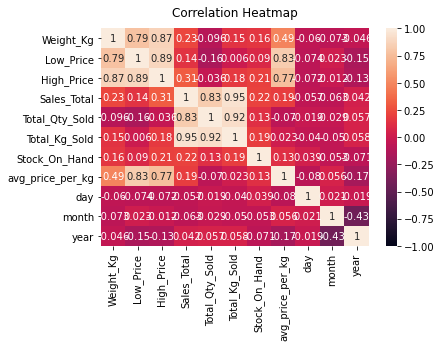

In [27]:
heatmap = sns.heatmap(df_train_o.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

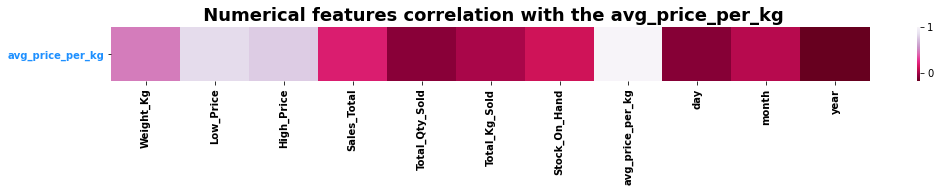

In [28]:
num=df_train_o.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['avg_price_per_kg'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the avg_price_per_kg", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

The graphs above show us heat maps of the correlations between our data. 

## Dummy Variable Encoding

We have already filtered the data to only include golden delicious apples as our commodities, so we will now drop the commodities column because it has the same repeated data. We will also drop our Date columns because we have already created day, month and year columns. We will also drop the year columns because we only have data for end 2019 to 2020 therefore the year will not make a difference on our preditions. 

In [29]:
df_train_o = df_train_o.drop(['Commodities'], axis = 1)
df_train_o = df_train_o.drop(['Date'], axis = 1)
df_train_o = df_train_o.drop(['year'], axis = 1)

In [30]:
df_train_o.info() #lets check out our dataset now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 7 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1526 non-null   object 
 1   Container         1526 non-null   object 
 2   Size_Grade        1526 non-null   object 
 3   Weight_Kg         1526 non-null   float64
 4   Low_Price         1526 non-null   float64
 5   High_Price        1526 non-null   float64
 6   Sales_Total       1526 non-null   float64
 7   Total_Qty_Sold    1526 non-null   int64  
 8   Total_Kg_Sold     1526 non-null   float64
 9   Stock_On_Hand     1526 non-null   int64  
 10  avg_price_per_kg  1526 non-null   float64
 11  day               1526 non-null   int64  
 12  month             1526 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 199.2+ KB


In order to be able to use our categorical data (Province, Container, Size_Grade) in our model we will need to turn it into numerical data using dummy variable encoding.

In [31]:
df_dummies = pd.get_dummies(df_train_o)

#lets make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-","_") for col in df_dummies.columns]
#lets have a look at our data
df_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,...,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,13,3,...,0,0,0,0,0,0,0,1,0,0
117,12.0,100.0,100.0,1200.0,12,144.0,119,8.33,30,12,...,0,1,0,0,0,0,0,0,0,0
122,11.0,70.0,70.0,5600.0,80,880.0,0,6.36,5,8,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df_dummies.shape

(1526, 37)

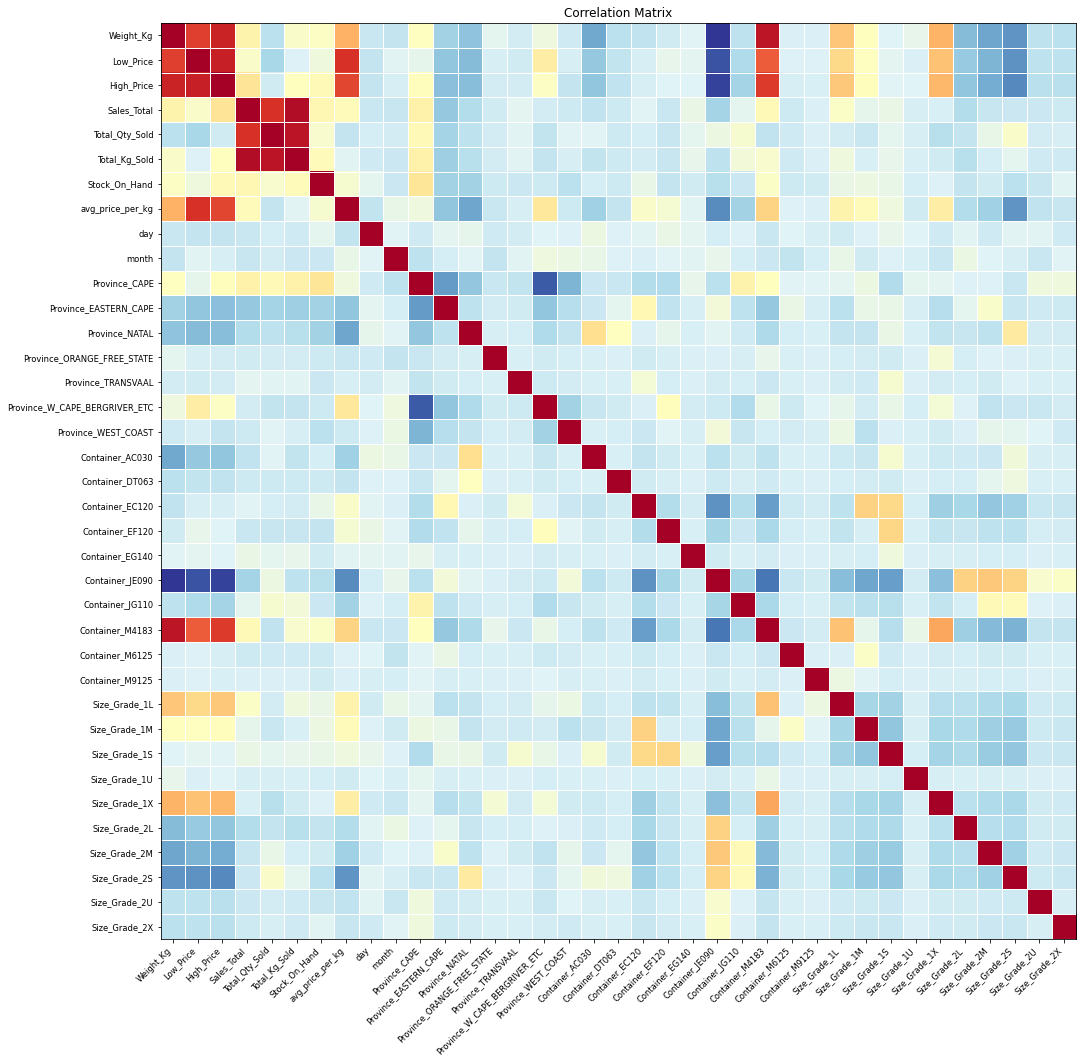

In [33]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

As we can see above our table now has 39 columns instead of 15 due to the dummy variables. It is a good idea to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model. So we willspend some time testing different feature engineering methods that will give us the best model.

We will start by using a filter method - variable selectin by variance threshold using sklearn.

# Variable Selection by Variance Thresholds

we will use a variance threshold of 3% 

## Prepare the data and import sklearn

In [34]:
# Separate data into independent (X) and dependent (y) variables
y_name = 'avg_price_per_kg'
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

Implementing the Variance Threshold.

In [36]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [37]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      1526 non-null   float64
 1   Low_Price                      1526 non-null   float64
 2   High_Price                     1526 non-null   float64
 3   Sales_Total                    1526 non-null   float64
 4   Total_Kg_Sold                  1526 non-null   float64
 5   Stock_On_Hand                  1526 non-null   float64
 6   day                            1526 non-null   float64
 7   month                          1526 non-null   float64
 8   Province_CAPE                  1526 non-null   float64
 9   Province_EASTERN_CAPE          1526 non-null   float64
 10  Province_NATAL                 1526 non-null   float64
 11  Province_W_CAPE_BERGRIVER_ETC  1526 non-null   float64
 12  Province_WEST_COAST            1526 non-null   f

With a threshold of 5% we have gone from 39 to 19 predictors.

Now let's graph the number of predictors by the thresholds to investigate the relationship:

##  Model prediction of Average price per kg

With the reduction of features, we can now attempt to fit models to our dataframe.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Pre-processing

Lets do some pre processing of our data to make sure its ready for modelling

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [40]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [42]:
# Get training and testing data for correlation threshold model
X_corr_names = X_names
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

## Fit models

We will instantiate and fit our models

In [43]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [44]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

### Assessing model accuracy

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

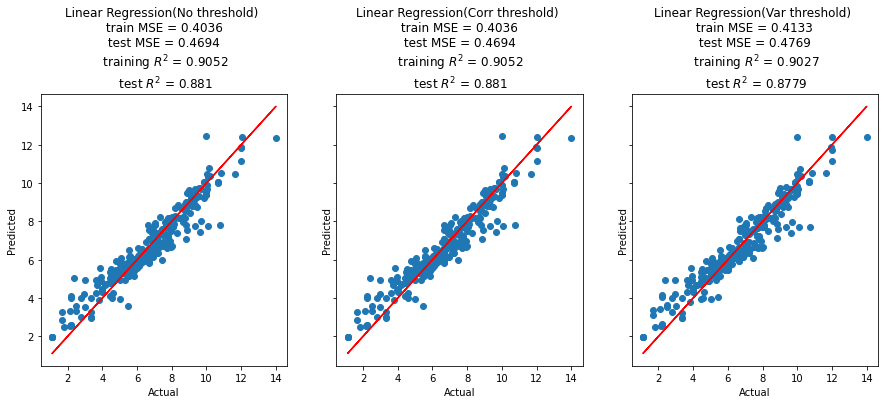

In [46]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])